<a href="https://colab.research.google.com/github/monteroanibal/diplomado_GEOIA_IGAC2025/blob/main/Interm_Modulo_18_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupyter Notebook de la sesión

---

Se configura una semilla para replicar el ejercicio.

In [54]:
semilla = 24680

# 1. Cargue de librerías

Para manipular objetos y métodos de Numpy.

In [55]:
import numpy as np
print(np.__version__)

2.0.2


Para importar los ráster (rasterio). la función show permite graficar los ráster de una forma básica.

In [56]:
%%capture
!pip install rasterio

import rasterio as rs
from rasterio.plot import show

Para partir el conjunto de datos entre los subconjuntos de datos entrenamiento, validación y prueba.

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split

Para hacer los gráficos de barras y de dispersión.

In [58]:
import matplotlib.pyplot as plt

Para calcular las métricas de desempeño predictivo.

In [59]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Para medir el tiempo que toma ejecutar las partes del código.

In [60]:
from time import time

Para tomar muestras aleatorias a partir de elementos de lista.

In [61]:
import random

Para hacer los gráficos de las historias de entrenamiento y para hacer el scatterplot de residuales.

In [62]:
import matplotlib.pyplot as plt

def plot_loss(history):
  plt.plot(history.history['loss'], label='Entrenamiento')
  plt.plot(history.history['val_loss'], label='Validación')
  plt.xlabel('Época')
  plt.ylabel('Error')
  plt.legend()
  plt.grid(True)

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='Entrenamiento')
  plt.plot(history.history['val_accuracy'], label='Validación')
  plt.xlabel('Época')
  plt.ylabel('Exactitud')
  plt.legend()
  plt.grid(True)

import seaborn as sns

Librerías y métodos para construir la Red Neuronal Artificial.

In [63]:
from tensorflow.keras import backend, initializers, optimizers, layers, callbacks
from tensorflow.keras.regularizers import l1
backend.set_image_data_format('channels_first')

from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization, LeakyReLU

Para tomar el tiempo durante el entrenamiento de la Red Neuronal Artificial.

In [64]:
from timeit import default_timer as timer

class TimingCallback(callbacks.Callback):
    def __init__(self, logs={}):
        self.logs=[]
    def on_epoch_begin(self, epoch, logs={}):
        self.starttime = timer()
    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(timer()-self.starttime)

cb = TimingCallback()

from time import perf_counter

Para calcular las métricas de desempeño predictivo en el conjunto de datos de test.

In [65]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 2. Lectura y primera exploración de datos ráster



*Primero*, se almacenan los nombres de las capas en una lista, tal y como se encuentran los nombres de los archivos, sin incluir la extensión .tif.

In [66]:
capas = ['po_2018','B4_2018','B3_2018','B2_2018','B8_2018']

Se cargan las capas de forma iterativa al leer la lista de los nombres de los archivos. Las capas en .tif quedan cargadas en la sesión con el respectivo nombre del archivo.

Debido a que las diferentes bandas de sentinel (B4, B3, B2) se encuentran en un mismo .tif, estas no se incluyen en la iteración y se importa cada banda de forma individual, modificando el índice del objeto que se encuentra al final de la línea de importación ([0], [1], [2], [3]).

In [67]:
%%capture
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_18_Datos/Interm_Modulo_18_Sentinel2_MSI_Level2A_2018_76147_re.tif
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_18_Datos/Interm_Modulo_18_Sentinel2_MSI_Level2A_2023_76147_re.tif
!wget https://github.com/monteroanibal/diplomado_GEOIA_IGAC2025/raw/refs/heads/main/Insumos/Interm_Modulo_18_Datos/Interm_Modulo_18_Pobl_CNPV2018_76147_re.tif

In [68]:
poblacion2018 = rs.open('/content/Interm_Modulo_18_Pobl_CNPV2018_76147_re.tif')
sentinel_2018 = rs.open('/content/Interm_Modulo_18_Sentinel2_MSI_Level2A_2018_76147_re.tif')
sentinel_2023 = rs.open('/content/Interm_Modulo_18_Sentinel2_MSI_Level2A_2023_76147_re.tif')

po_2018 = poblacion2018.read()[0]
B4_2018 = sentinel_2018.read()[0]
B3_2018 = sentinel_2018.read()[1]
B2_2018 = sentinel_2018.read()[2]
B8_2018 = sentinel_2018.read()[3]

Se verifica que los ráster estén el el mismo sistema de coordenadas de referencia.

In [69]:
print( poblacion2018.crs )
print( sentinel_2018.crs )
print( sentinel_2023.crs )

EPSG:4326
EPSG:4326
EPSG:4326


Se verifica que se importaron los archivos bien, sumando los valores de los arrays de las capas.

Se utiliza la funcion locals() de manera análoga a la función globals(), esta vez, para invocar una variable a partir de una cadena de caracteres que lleva su nombre.

In [70]:
for nom in capas:
  print( nom + ':' )
  print( np.nansum(locals()[ nom ]) )
  print( ' ' )

po_2018:
118803.0
 
B4_2018:
114340656.87022266
 
B3_2018:
146734881.81885502
 
B2_2018:
93595900.74200206
 
B8_2018:
611716036.0906174
 


Se grafican los rásters importados, con la función show().

po_2018:


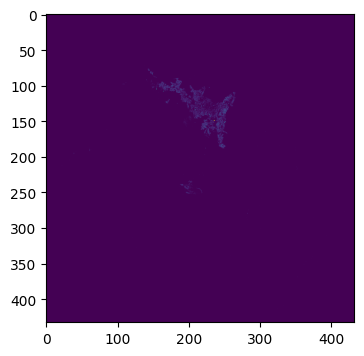

Axes(0.32,0.11;0.385x0.77)
 
B4_2018:


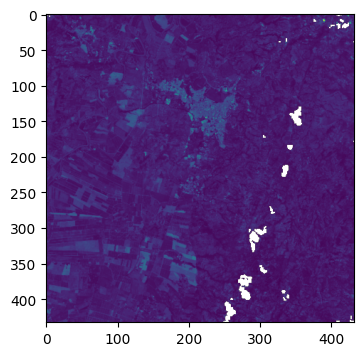

Axes(0.32,0.11;0.385x0.77)
 
B3_2018:


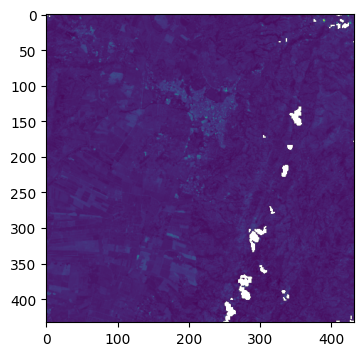

Axes(0.32,0.11;0.385x0.77)
 
B2_2018:


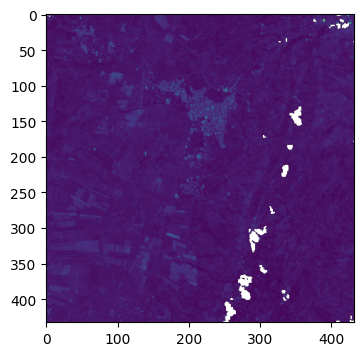

Axes(0.32,0.11;0.385x0.77)
 
B8_2018:


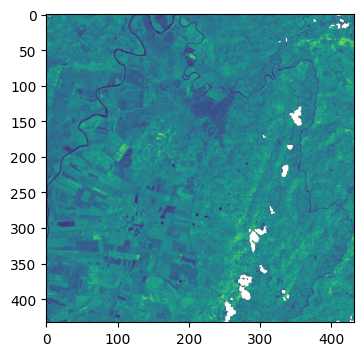

Axes(0.32,0.11;0.385x0.77)
 


In [71]:
for nom in capas:
  print( nom + ':' )
  print( show(locals()[ nom ]) )
  print( ' ' )

Se imprimen los valores máximo y mínimo de las capas originales en los ráster, solo para chequearlos.

In [72]:
for nom in capas:
  print( nom + ' mínimo:' )
  print( np.nanmin(locals()[ nom ]) )
  print( nom + ' máximo:' )
  print( np.nanmax(locals()[ nom ]) )
  print( ' ' )

po_2018 mínimo:
0.0
po_2018 máximo:
547.0
 
B4_2018 mínimo:
99.82538055483025
B4_2018 máximo:
6166.43096411196
 
B3_2018 mínimo:
247.5844848736963
B3_2018 máximo:
6383.255160537768
 
B2_2018 mínimo:
137.25782058738014
B2_2018 máximo:
5883.218192362004
 
B8_2018 mínimo:
140.1430392079939
B8_2018 máximo:
7326.118224636568
 


Se imprimen las dimensiones de las capas (Deben ser iguales todas), solo para chequearlas.

In [73]:
for nom in capas:
  print( nom + ':' )
  print( locals()[ nom ].shape )
  print( ' ' )

po_2018:
(433, 433)
 
B4_2018:
(433, 433)
 
B3_2018:
(433, 433)
 
B2_2018:
(433, 433)
 
B8_2018:
(433, 433)
 


Se chequean en orden los valores que toma la capa de población, donde se observan los valores más altos luego de ser organizados.

In [74]:
vals_po = po_2018.flatten().tolist()
vals_po.sort(reverse=True)
print(vals_po[:20])
del vals_po

[547.0, 284.0, 200.0, 193.0, 171.0, 170.0, 168.0, 160.0, 155.0, 149.0, 149.0, 147.0, 145.0, 142.0, 142.0, 141.0, 140.0, 136.0, 135.0, 131.0]


# 4. Se escalan, cruzan y balancean los datos **con dependencia local**


Se escalan los valores de cada capa de 0 a 1, excepto la capa de población.

In [75]:
for nom in capas[1:]:
  max_capa = np.nanmax(globals()[nom])
  min_capa = np.nanmin(globals()[nom])
  globals()[ nom ] = (globals()[ nom ]-min_capa)/(max_capa-min_capa)

Se imprimen los valores máximo y mínimo de las capas originales en los ráster, solo para chequearlos.

In [76]:
for nom in capas:
  print( nom + ' mínimo:' )
  print( np.nanmin(locals()[ nom ]) )
  print( nom + ' máximo:' )
  print( np.nanmax(locals()[ nom ]) )
  print( ' ' )

po_2018 mínimo:
0.0
po_2018 máximo:
547.0
 
B4_2018 mínimo:
0.0
B4_2018 máximo:
1.0
 
B3_2018 mínimo:
0.0
B3_2018 máximo:
1.0
 
B2_2018 mínimo:
0.0
B2_2018 máximo:
1.0
 
B8_2018 mínimo:
0.0
B8_2018 máximo:
1.0
 


Se ponen uno sobre otro los arrays de las capas de información y se separa la variable respuesta.

In [77]:
X_orig = np.stack([B4_2018, B3_2018, B2_2018, B8_2018], axis=0)
y_orig = po_2018

Se chequea la dimensión de la matriz tridimensional y de la matriz de valores de la capa de población.

In [78]:
X_orig.shape

(4, 433, 433)

In [79]:
y_orig.shape

(433, 433)

El siguiente loop construye una lista de pares de coordenadas basadas en la capa de población, y continuación de esta, se divide el conjunto de datos entre entrenamiento y prueba.

In [80]:
y_coord = []
for i in range(y_orig.shape[0]):
  for j in range(y_orig.shape[1]):
    y_coord.append([i,j])

temp_c = y_coord.copy()
random.shuffle(temp_c)
y_coord_train = temp_c[:len(temp_c)*75//100]
y_coord_test = temp_c[len(temp_c)*75//100:]

del y_coord, temp_c

El diseño de la muestra estratifica en dos grupos: pixeles que tienen valor cero y pixeles que no son cero. El siguiente loop construye tres listas de pares de coordenadas basadas en la capa que se muestrea. La primera, almacena todos los pares de coordenadas de pixeles; la segunda, almacena los pares de coordenadas de pixeles con valores diferentes a cero; y la tercera, almacena los pares de coordenadas de pixeles con valores iguales a cero.

In [81]:
y_coord_sample_pobl = []
y_coord_sample_cero = []

for c in range(len(y_coord_train)):
  if y_orig[y_coord_train[c][0]][y_coord_train[c][1]] != 0:
    y_coord_sample_pobl.append(y_coord_train[c])
  else:
    y_coord_sample_cero.append(y_coord_train[c])

Se toma una muestra aleatoria del conjunto de coordenadas de entrenamiento y de ceros con la función *random.sample*. El tamaño de esta muestra aleatoria depende del tamaño del estrato de pixeles que no son cero, pues este estrato de pixeles que no son cero está incluido por completo en la muestra final.

Se aplica la función *random.seed* para que aplique una semilla y se pueda replicar el ejercicio de forma idéntica.

La muestra final queda almacenada en el objeto *y_coord_sample*.

In [82]:
unids_sin_pobl_muestra = ((y_orig==1).sum()*2*8).astype(int)
print(unids_sin_pobl_muestra)

3168


In [83]:
y_coord_sample_cero = random.sample(y_coord_sample_cero, unids_sin_pobl_muestra )
y_coord_sample = y_coord_sample_pobl + y_coord_sample_cero

Se verifica el tamaño total de la muestra.

In [84]:
len(y_coord_sample_pobl)

3136

In [85]:
len(y_coord_sample_cero)

3168

In [86]:
len(y_coord_sample)

6304

In [87]:
del y_coord_sample_pobl, y_coord_sample_cero

La siguiente celda de código, extrae los subarrays, o lo que se han denominado las ventanas que sirven de unidades de análisis. La ventana es un corte en la zona de estudio que contiene las capas del conjunto de capas original.

Este código recorre el conjunto de coordenadas de la muestra para recortar las ventanas alrededor de estas coordenadas. El resultado es almacenado en la lista *X_sample*. Los valores de la capa a predecir se almacenan en la lista *y_sample* y están relacionados uno a uno con las ventanas de *X_sample*.

El método *np.split* realiza dos cortes horizontales en *[ini_corte_fila,fin_corte_fila]*.

Así mismo, el método *np.split* realiza dos cortes verticales en *[ini_corte_colu,fin_corte_colu]*.

La celda de código aplica además, giros y espejos de forma aleatoria, lo que permite eliminar el efecto de alguna posible tendencia espacial en los datos y que pueda ser aprendida equivocadamente por la red neuronal. Esta estrategia también aplicaría en caso de necesitar realizar aumento de datos. Para esto, el loop almacena el giro o espejo aplicado aleatoriamente en *X_ventana_girada* y anexa el resultado a la lista *X_sample*.

En el primer *if* que aparece en la celda de código, se descartan las muestras que caen sobre el borde de la zona de estudio, es decir, aquellas ventanas de la muestra que quedan incompletas porque sus coordenadas transpasan los bordes de la zona de estudio.

El tamaño de la ventana es un hiperparámetro de la máquina a entrenar.

In [88]:
tamanyo_ventana = 3 # ingresar nuumero impar

In [89]:
# coodigo verificado con versioon de numpy 2.0.2

X_sample = []
y_sample = []
ventanas_sample = range(len(y_coord_sample))

X_test = []
y_test = []
ventanas_test = range(len(y_coord_test))

t = time()


for v in ventanas_sample:
  ini_corte_fila = y_coord_sample[v][0] - int(tamanyo_ventana/2)
  fin_corte_fila = y_coord_sample[v][0] + int(tamanyo_ventana/2)

  ini_corte_colu = y_coord_sample[v][1] - int(tamanyo_ventana/2)
  fin_corte_colu = y_coord_sample[v][1] + int(tamanyo_ventana/2)

  X_ventana = np.split( np.split( X_orig , [ini_corte_fila,fin_corte_fila+1] , axis=1 )[1] , [ini_corte_colu,fin_corte_colu+1] , axis=2 )[1]
  if ( X_ventana.shape[0] == X_orig.shape[0] and X_ventana.shape[1] == tamanyo_ventana and X_ventana.shape[2] == tamanyo_ventana and not np.isnan(X_ventana).any()):

    r3 = random.randint(1,8)
    if r3 == 1:
      X_ventana_girada  =  X_ventana
    else:
      if r3 == 2:
        X_ventana_girada  =  np.rot90(X_ventana,1,(1,2))
      else:
        if r3 == 3:
          X_ventana_girada  =  np.flip(X_ventana,1)
        else:
          if r3 == 4:
            X_ventana_girada  =  np.rot90(X_ventana,3,(1,2))
          else:
            if r3 == 5:
              X_ventana_girada  =  np.flip(X_ventana,2) #espejo
            else:
              if r3 == 6:
                X_ventana_girada  =  np.flip(X_ventana,2) #espejo
                X_ventana_girada  =  np.rot90(X_ventana_girada,1,(1,2))
              else:
                if r3 == 7:
                  X_ventana_girada  =  np.flip(X_ventana,2) #espejo
                  X_ventana_girada  =  np.flip(X_ventana_girada,1)
                else:
                  X_ventana_girada  =  np.flip(X_ventana,2) #espejo
                  X_ventana_girada  =  np.rot90(X_ventana_girada,3,(1,2))

    X_sample.append( X_ventana_girada )
    y_sample.append( y_orig[ y_coord_sample[v][0] ][ y_coord_sample[v][1] ] )

for v in ventanas_test:
  ini_corte_fila = y_coord_test[v][0] - int(tamanyo_ventana/2)
  fin_corte_fila = y_coord_test[v][0] + int(tamanyo_ventana/2)

  ini_corte_colu = y_coord_test[v][1] - int(tamanyo_ventana/2)
  fin_corte_colu = y_coord_test[v][1] + int(tamanyo_ventana/2)

  X_ventana = np.split( np.split( X_orig , [ini_corte_fila,fin_corte_fila+1] , axis=1 )[1] , [ini_corte_colu,fin_corte_colu+1] , axis=2 )[1]
  if ( X_ventana.shape[0] == X_orig.shape[0] and X_ventana.shape[1] == tamanyo_ventana and X_ventana.shape[2] == tamanyo_ventana and not np.isnan(X_ventana).any()):

    X_test.append( X_ventana )
    y_test.append( y_orig[ y_coord_test[v][0] ][ y_coord_test[v][1] ] )


print("Tiempo de ejecución: %0.3fs" % (time() - t))

Tiempo de ejecución: 1.269s


Se barajan los datos de entrenamiento con la función *random.shuffle*.

In [90]:
barajar = list(zip(X_sample, y_sample))
random.shuffle(barajar)
X_sample, y_sample = zip(*barajar)
del barajar

Se ponen los recortes de ventanas apiladas en un mismo array.

In [91]:
X_sample = np.stack(X_sample, axis=0)
y_sample = np.array(y_sample)

X_test = np.stack(X_test, axis=0)
y_test = np.array(y_test)

# 5. Configuración de hiperparámetros y entrenamiento de la RNA





Se configuran los hiperparámetros de la Red Neuronal Artificial, a excepción de la arquitectura de la Red Neuronal Artificial como tal.

In [92]:
# no editar
Test_size         = 0.1
Validation_size   = 0.1/(1-Test_size)
Channels          = X_sample.shape[1]

# experimentar
Batch_size        = 32
Epochs            = 35
Learning_Rate     = 0.00001
Activation_func   = 'relu'
Optimizer         = 'adam'
Loss_func         = 'mean_absolute_error'
activar_batchnorm = False
activar_dropout   = False
activar_regulariz = False

Implementación de la arquitectura, luego de la ejecución de los experimentos para la afinación de hiperparámetros.

In [93]:
initializer = initializers.GlorotNormal(seed=1234)
modelo = Sequential()

modelo.add(Conv2D( 20 , (5,5) , input_shape=(Channels,tamanyo_ventana,tamanyo_ventana) , padding='same', kernel_initializer=initializer))
if activar_batchnorm:
  modelo.add(BatchNormalization())
modelo.add(Activation(Activation_func))
modelo.add(MaxPooling2D( pool_size=(2,2) , padding='same' ))
if activar_dropout:
  modelo.add(Dropout(0.5))

modelo.add(Conv2D( 20 , (5,5) , padding='same', kernel_initializer=initializer))
if activar_batchnorm:
  modelo.add(BatchNormalization())
modelo.add(Activation(Activation_func))
modelo.add(MaxPooling2D( pool_size=(2,2) , padding='same' ))
if activar_dropout:
  modelo.add(Dropout(0.5))

modelo.add(Flatten())
if activar_regulariz:
  modelo.add(Dense(120, kernel_initializer=initializer, kernel_regularizer=l1(0.01)))
else:
  modelo.add(Dense(120, kernel_initializer=initializer))
if activar_batchnorm:
  modelo.add(BatchNormalization())
modelo.add(Activation(Activation_func))
if activar_dropout:
  modelo.add(Dropout(0.5))

if activar_regulariz:
  modelo.add(Dense(84, kernel_initializer=initializer, kernel_regularizer=l1(0.01)))
else:
  modelo.add(Dense(84, kernel_initializer=initializer))

modelo.add(Dense(1, activation='linear', kernel_initializer=initializer))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Se imprime la arquitectura obtenida. En esta vista se puede observar el número de parámetros entrenables (pesos, weights o coeficientes).

In [94]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 20, 3, 3)       │         2,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 20, 3, 3)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 2, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 20, 2, 2)       │        10,020 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 20, 2, 2)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 20, 1, 1)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 120)            │         2,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            85 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,809 (96.91 KB)

 Trainable params: 24,809 (96.91 KB)

 Non-trainable params: 0 (0.00 B)

Se compila el modelo a partir de la arquitectura que se definió anteriormente.

In [95]:
modelo.compile( loss=Loss_func, optimizer=optimizers.Adam(Learning_Rate) )

Se entrena el modelo. El parámetro *verbose=1* es para que imprima todo el proceso.

In [96]:
t = time()
ajuste_modelo = modelo.fit( X_sample, y_sample, verbose=1, callbacks=[cb], validation_split=Validation_size, epochs=Epochs, batch_size=Batch_size )
print("Tiempo de ejecución: %0.3fs" % (time() - t))

Epoch 1/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 13.7345 - val_loss: 14.5267
Epoch 2/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.0888 - val_loss: 14.5154
Epoch 3/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.1885 - val_loss: 14.4982
Epoch 4/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 14.1533 - val_loss: 14.4682
Epoch 5/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.2635 - val_loss: 14.4241
Epoch 6/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.0720 - val_loss: 14.3595
Epoch 7/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.4384 - val_loss: 14.2724
Epoch 8/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14.2228 - val_loss: 14.1568
Epoch 9/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.6728 - val_loss: 14.0072
Epoch 10/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.3436 - val_loss: 13.8249
Epoch 11/35
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 13.3519 - val_loss: 13.6094
Epoch 12/35
173/173 ━━━━━━━━

# 6. Resultados del desempeño de la RNA

Se chequea la convergencia del algoritmo a partir de la métrica de función de pérdida definida en los hiperparámetros, y monitoreada a través de las épocas de entrenamiento de la red neuronal.

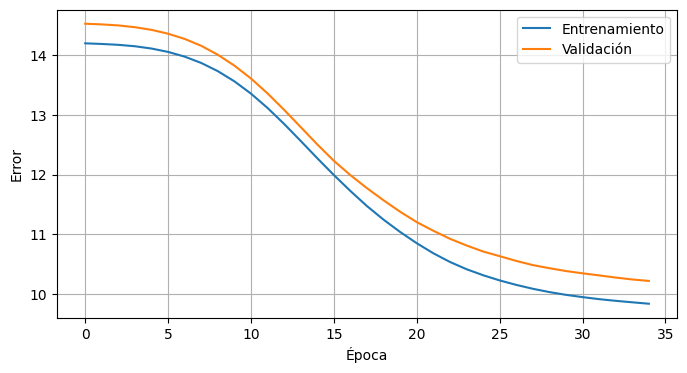

In [97]:
plot_loss(ajuste_modelo)

Se verifica que los pesos (weights, o coeficientes) de la red neuronal tengan valores coherentes y sin nan's.

In [98]:
#print(modelo.trainable_variables)

Se revisa la predicción para el conjunto de entrenamiento por medio del cálculo de los residuales.

In [99]:
res_val = modelo.predict( X_sample ).flatten() - y_sample

194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


Se grafica un scatterplot entre los valores originales a predecir del conjunto de datos de entrenamiento y los residuales. Se espera que estos residuales se encuentren alrededor de cero.

En el gráfico se puede observar si existen posibles correlaciones entre el valor predicho y los residuales, e incluso si existen tendencias a subestimar o sobre-estimar por parte de la Red Neuronal Artificial.

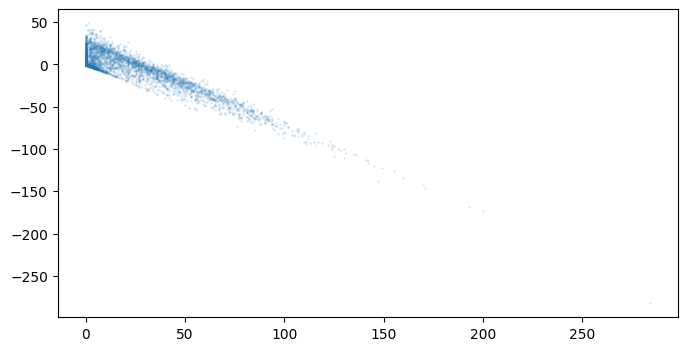

In [100]:
g = sns.regplot(x=y_sample, y=res_val.flatten(), scatter_kws={'s':1,'alpha':0.1},fit_reg=False)
del g

Se grafica un histograma de los residuales. Se espera que estos residuales se encuentren alrededor de cero.

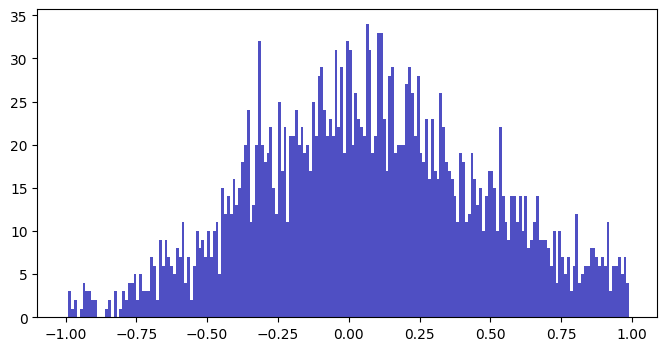

In [101]:
plt.rcParams["figure.figsize"] = (8,4)
gr = plt.hist(x=res_val.flatten(), color='#0504aa', alpha=0.7, bins=np.arange(-1,1,0.01))
del gr

Se predicen los valores para el conjunto de datos de prueba y se calculan directamente los residuales.

In [102]:
y_test_pred = modelo.predict( X_test ).flatten()
res_tst = y_test_pred - y_test

1430/1430 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


De nuevo se grafica un scatterplot entre los valores originales a predecir del conjunto de datos de test y sus residuales.

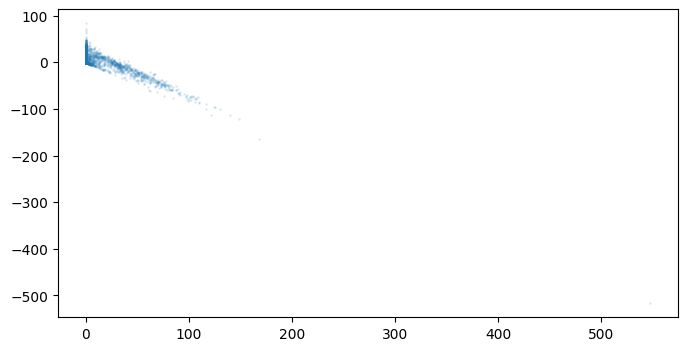

In [103]:
g = sns.regplot(x=y_test, y=res_tst.flatten(), scatter_kws={'s':1,'alpha':0.1},fit_reg=False)
del g

Se despliegan los valores de las métricas de desempeño sobre el conjunto de datos de test.

In [104]:
r2_test = r2_score(y_test, y_test_pred)
print(f"Test R-squared: {r2_test:.4f}")

Test R-squared: -0.1703


In [105]:
mse_test = mean_squared_error(y_test, y_test_pred)
print(f"Test mean squared error: {mse_test:.4f}")

Test mean squared error: 48.7940


In [106]:
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f"Test mean absolute error: {mae_test:.4f}")

Test mean absolute error: 2.3220


**Importante:** En las anteriores sesiones se mostraron códigos en los que se realizó el desenrollado de rasters para realizar predicciones con los datos de estos para luego reconstruir un nuevo raster a partir de los datos generados por estos predictores, por lo se invita al estudiante a utilizar esos ejemplos ya vistos para aplicar el mismo proceso para extrapolar la población de Cartago - Cauca a partir de la imagen compuesta Sentinel de 2023.